In [25]:
import pandas as pd
import os
import seaborn as sns
import matplotlib as plt
import plotly.graph_objects as go
import plotly.figure_factory as ff
import datetime
import plotly.express as px
import pandas as pd
from pymongo import MongoClient

In [26]:
# loading data set into pandas dataframe
df = pd.read_csv("C:/Msc Data Analytics/Database and Analytics program/DAP_PRJ/final_data_set.csv")


In [27]:
df.head(5)

,Unnamed: 0,Event_ID,Year,Country_Code,Country_Name,Latitude,Longitude,Type,Death_Toll,Severity
0,0,1000,1966,TKL,Tokelau,-8.967363,-171.855881,Storm,20,NaN
1,1,1001,2014,CHN,China,35.861660,104.195397,Storm,20,Medium Risk
2,2,1002,2010,CHN,China,35.861660,104.195397,Earthquake,20,Medium Risk
3,3,1003,1999,SDN,Sudan,12.862807,30.217636,Epidemic,102,High Risk
4,4,1004,1909,CHN,China,35.861660,104.195397,Earthquake,21,Medium Risk


### Visualization

                       Type
Flood                   540
Storm                   422
Earthquake              200
Epidemic                149
Landslide                76
Drought                  63
Tropical cyclone         59
Extreme temperature      47
Wildfire                 43
Volcanic activity        20
Heat wave                12
Insect infestation        9
Tsunami                   8
Mass movement (dry)       6
Fog                       1
Glacial lake outburst     1
Volcanic eruption         1
Limnic eruption           1


<AxesSubplot:>

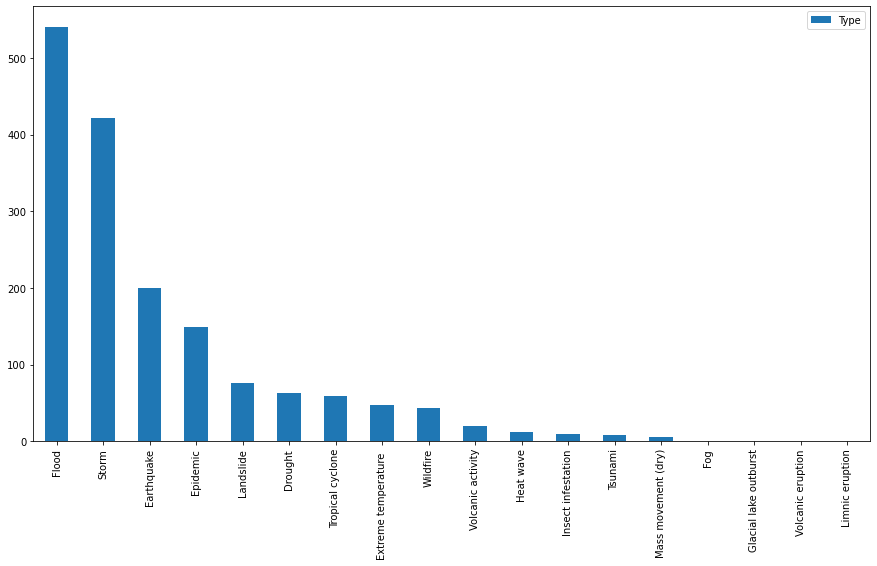

In [28]:
Disaster_type= df['Type'].value_counts()
df1 = pd.DataFrame([Disaster_type]).T
print (df1)
df1.plot(kind='bar',stacked=True, figsize=(15,8))

#### Above Figure shows Flood is the most prominent Disaster.

In [29]:
# Top Countries with maximum risk
p = df[['Country_Name','Type']].groupby('Country_Name').count()
p.reset_index(inplace=True)
p=p.sort_values(by='Type',ascending=False).head(10)
p

,Country_Name,Type
35,China,112
177,United States,101
76,India,93
77,Indonesia,69
129,Philippines,67
13,Bangladesh,45
83,Japan,38
78,Iran,31
104,Mexico,25
124,Pakistan,24


In [30]:
fig = px.histogram(df, x="Country_Name", y="Year", color="Country_Name", marginal="rug",
                   hover_data=df.columns)
fig.show()

#### Above fig shows that China Followed by United States , India , Indonesia and Phillipines are the top 5 countries effected by disasters. 

In [31]:
fig = px.histogram(df, x="Year", y="Death_Toll", color="Type", marginal="rug",
                   hover_data=df.columns)
fig.show()

#### Above Figure Shows 1930 - 1934 is the worst years in terms of death rate.

In [32]:

fig = px.bar(df, x='Year', y='Death_Toll')
fig.show()

### Above fig shows that in 1931 there is arount 4 millions death count so digging more about what has happened in 1931.

In [33]:
#bar charts
import plotly.graph_objects as go  

colors = ['lightslategray',] * 20  
colors[0] = 'crimson'

data_1931 = df.query("Year == 1931")


xvar = list(data_1931.head(30)['Country_Name'])
yvar = list(data_1931.head(30)['Type']) 

fig = go.Figure(data=[go.Bar(x=xvar,  y=yvar, marker_color=colors )])

fig.update_layout(title_text='Type of disaster happened in 1931')

#### Above Figure shows that China's Flood , China's Earthquake and vocanic activity in Indonesia has caused huge loss of life in 1931

#### Exploring more about china, United State , INDIA, Indonesia, Philippines  as these three are the top 5 countries most effected by disaster over time

## About China

In [34]:
import plotly.graph_objects as go 
values =df.query('Country_Name=="China"')['Death_Toll'].value_counts()
m=df.query('Country_Name=="China"')['Type']
fig = go.Figure(data=[go.Pie(labels=m, values=values)])
fig.update_layout(title='China disaster observation')


fig.show()

In [35]:
# To show which years are worst years in CHINA from disaster perspective
import plotly.express as px
df1 = df.query('Country_Name=="China"')
fig = px.histogram(df1, x="Year", y="Death_Toll", color="Year", marginal="rug",
                   hover_data=df1.columns)
fig.update_layout(title='Number of Disasters happened in China over the period of time')
fig.show()

### Above Figures shows that China has mostly effected by Storm. 1931 is the worst year in China from disaster perspective when lot of deaths were reported due to flood.

### About United States

In [36]:
import plotly.graph_objects as go 
values =df.query('Country_Name=="United States"')['Death_Toll'].value_counts()
m=df.query('Country_Name=="United States"')['Type']
fig = go.Figure(data=[go.Pie(labels=m, values=values)])
fig.update_layout(title='United States disaster observation')


fig.show()

In [37]:
# To show which years are worst years in United States from disaster perspective
import plotly.express as px
df2 = df.query('Country_Name=="United States"')
fig = px.histogram(df2, x="Year", y="Death_Toll", color="Year", marginal="rug",
                   hover_data=df.columns)
fig.update_layout(title='Number of Disasters happened in United States over the period of time')
fig.show()

### Above Figures shows that United Staes has mostly effected by Storm. 1936 is the worst year in United States from disaster perspective when lot of deaths were reported due to heat wave.

### About India

In [38]:
import plotly.graph_objects as go 
values =df.query('Country_Name=="India"')['Death_Toll'].value_counts()
m=df.query('Country_Name=="India"')['Type']
fig = go.Figure(data=[go.Pie(labels=m, values=values)])
fig.update_layout(title='India disaster observation')


fig.show()

In [39]:
# To show which years are worst years in India from disaster perspective
import plotly.express as px
df3 = df.query('Country_Name=="India"')
fig = px.histogram(df3, x="Year", y="Death_Toll", color="Year", marginal="rug",
                   hover_data=df3.columns)
fig.update_layout(title='Number of Disasters happened in India over the period of time')
fig.show()

### Above Figures shows that India has mostly effected by Flood. 1970 is the worst year in India from disaster perspective when lot of deaths were reported due to Tropical Cyclone.

### About Indonesia

In [40]:
import plotly.graph_objects as go 
values =df.query('Country_Name=="Indonesia"')['Death_Toll'].value_counts()
m=df.query('Country_Name=="Indonesia"')['Type']
fig = go.Figure(data=[go.Pie(labels=m, values=values)])
fig.update_layout(title='Indonesia disaster observation')


fig.show()

In [41]:
# To show which years are worst years in Indonesia from disaster perspective
import plotly.express as px
df4 = df.query('Country_Name=="Indonesia"')
fig = px.histogram(df4, x="Year", y="Death_Toll", color="Year", marginal="rug",
                   hover_data=df4.columns)
fig.update_layout(title='Number of Disasters happened in Indonesia over the period of time')
fig.show()

### Above Figures shows that Indonesia has mostly effected by Earthquake. 2004 is the worst year in Indonesia from disaster perspective when lot of deaths were reported due to Tsunami.

### About Phillipines

In [42]:

import plotly.graph_objects as go 
values =df.query('Country_Name=="Philippines"')['Death_Toll'].value_counts()
m=df.query('Country_Name=="Philippines"')['Type']
fig = go.Figure(data=[go.Pie(labels=m, values=values)])
fig.update_layout(title='Philippines disaster observation')


fig.show()

In [43]:
# To show which years are worst years in Philippines from disaster perspective
import plotly.express as px
df5 = df.query('Country_Name=="Philippines"')
fig = px.histogram(df5, x="Year", y="Death_Toll", color="Year", marginal="rug",
                   hover_data=df5.columns)
fig.update_layout(title='Number of Disasters happened in Philippines over the period of time')
fig.show()

### Above Figures shows that Philippines has mostly effected by Storm. 1922 is the worst year in Philippines from disaster perspective when lot of deaths were reported due to Tropical Cyclone.